# Programación genética

![](https://upload.wikimedia.org/wikipedia/commons/7/77/Genetic_Program_Tree.png)
Fuente: wikipedia

![](https://www.researchgate.net/profile/Mohammed-El-Telbany/publication/4113357/figure/fig1/AS:279938642006020@1443753981702/Genetic-programming-operators-a-mutation-b-crossover.png)
Fuente: researchgate

Librería: https://gplearn.readthedocs.io

In [9]:
!pip3 install gplearn
# !pip3 install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

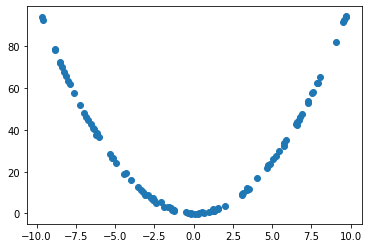

In [3]:
# Training samples
X_train = np.random.uniform(-10,10,100).reshape(-1,1)
y_train = X_train**2 + 0.5*np.random.randn(100).reshape(-1,1)

# y_train = X_train**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train, y_train, color='tab:blue')
plt.show()

In [4]:
y_train = y_train.reshape(100,)

In [5]:
est_gp = SymbolicRegressor(population_size=500,
                           generations=30, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    46.66           131515        7         0.743952         0.268568     11.46s
   1    32.78           146.26        7         0.364808          0.39676      7.89s
   2    13.36          39.3249        5         0.339793         0.681125      5.91s
   3     4.46          28.6758        3         0.343608         0.587558      4.72s
   4     3.34          30.3864        3         0.329808         0.711762      4.59s
   5     3.44          27.4267        3         0.337483         0.642684      4.36s
   6     3.15          32.9834        3         0.342246          0.59982      4.25s
   7     3.18          28.2605        3         0.341586         0.605758      3.95s
   8     3.29          216.336        3         0.347518         0.552371  

SymbolicRegressor(generations=30, max_samples=0.9, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.1, parsimony_coefficient=0.01,
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [6]:
print(est_gp._program)

mul(X0, X0)


In [8]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

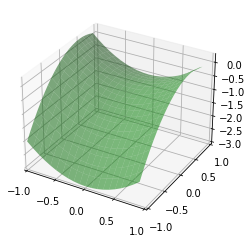

In [9]:
x0 = np.arange(-1, 1, 1/10.)
x1 = np.arange(-1, 1, 1/10.)
x0, x1 = np.meshgrid(x0, x1)
y_truth = x0**2 - x1**2 + x1 - 1

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
surf = ax.plot_surface(x0, x1, y_truth, rstride=1, cstride=1,
                       color='green', alpha=0.5)
plt.show()

In [18]:
rng = check_random_state(0)

# Training samples
X_train = rng.uniform(-1, 1, 100).reshape(50, 2)
y_train = X_train[:, 0]**2 - X_train[:, 1]**2 + X_train[:, 1] - 1

# Testing samples
X_test = rng.uniform(-1, 1, 100).reshape(50, 2)
y_test = X_test[:, 0]**2 - X_test[:, 1]**2 + X_test[:, 1] - 1


In [19]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=0)


In [20]:
est_gp.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    38.13          458.578        5         0.320666         0.556764      1.07m
   1     9.97          1.70233        5         0.320202         0.624787     38.01s
   2     7.72          1.94456       11         0.239537         0.533148     35.24s
   3     5.41         0.990157        7         0.235676         0.719906     31.34s
   4     4.66         0.894443       11         0.103946         0.103946     28.49s
   5     5.41         0.940242       11         0.060802         0.060802     27.14s
   6     6.78          1.09536       11      0.000781474      0.000781474     24.66s


SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=0, stopping_criteria=0.01, verbose=1)

In [21]:
print(est_gp._program)

sub(add(-0.999, X1), mul(sub(X1, X0), add(X0, X1)))


In [22]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Ejercicio: Generar datos con ruido a partir de una función, proponer otras gramáticas y correr el algoritmo de programación genética.